In [1]:
# Pre-processing word and pdf documents
import docx2txt
import PyPDF2 
import os

import pandas as pd
import numpy as np



doc_label=[] 
doc_text=[]
DocPath=[]

# Other items to be removed - dates, Numbers, Hyperlinks, what about images?, Should we keep headers
Dictionary={"\n":" ","\xa0":" ", "NULL":" ", "NOT NULL": "  "}

os.chdir('C://Users//L833377//Desktop//ClassificationEngineIdeas//data')
rootdir = os.getcwd()
i=0 
j=0
for subdir, dirs, files in os.walk(rootdir):
    if i==0:
        # Extracting the list of directories ['Claims', 'FinanceandCost', 'HealthCareDelivery', 'Membership', 'Pharmacy', 'ProductandBenefits', 'ProviderandNetwork', 'SalesandMarketing']
        label=dirs
        #print(label)
        i=i+1
    for file in files:
        #print os.path.join(subdir, file)
        
        filepath = subdir + os.sep + file

        if filepath.endswith(".docx"):
            # read in word file
            result = docx2txt.process(filepath)
            
            for i in Dictionary:
                result=result.replace(i,Dictionary[i])
            doc_text.append(result)
            doc_label.append(label[j-1])
            DocPath.append(filepath)
            
        # importing required modules 

        if filepath.endswith(".pdf"):
            
            # creating a pdf file object 
            
            pdfFileObj = open(filepath, 'rb') 
  
            # creating a pdf reader object 
            pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
  
            # printing number of pages in pdf file 
            #print(pdfReader.numPages) 
  
            # creating a page object 
            pageObj = pdfReader.getPage(0) 
  
            # extracting text from page 
            result=pageObj.extractText()
        
            #print(result)
            # closing the pdf file object 
            pdfFileObj.close() 
        
            for i in Dictionary:
                result=result.replace(i,Dictionary[i])
                
            doc_text.append(result)
            doc_label.append(label[j-1])
            DocPath.append(filepath)
      
    j=j+1


df1 = {
    'Label':doc_label,
   'Text':doc_text,
    'DocPath':DocPath}
 
df1 = pd.DataFrame(df1,columns=['Label','Text','DocPath'])
print(df1)


                 Label                                               Text  \
0               Claims  Claims Authorization Matching Logic (CAML) for...   
1               Claims  External Claim  Synopsis  This star schema all...   
2   HealthCareDelivery  Surgery Case Fact  Synopsis  Kaiser Permanente...   
3           Membership  Common Membership   Introduction  Common Membe...   
4           Membership  Group Health  TBD        Group Health  TBD    ...   
5           Membership  CDE-CO  HRNs - Member, Subscriber, Primary  He...   
6           Membership  V_DIM_DISPENSE_DATENameDataTypePKDIM_DISPENSE_...   
7           Membership  CDE-CO  Membership - Line of Business  Line of...   
8           Membership  Membership Data Mart  Overview  Anyone who rec...   
9             Pharmacy  DIM_DRUG DRUG_IKNUMBER(38)NOT   SRC_NHIN_STORE...   
10            Pharmacy  Skip to content    DashboardBusiness GlossaryR...   
11            Pharmacy  PDW PCARS ePIMs CO  Transactional  system Phar...   

In [38]:
# Pre-processing Sharepoint Documents
# Gather a list of urls that need to be processed

import json

from office365.runtime.auth.authentication_context import AuthenticationContext
from office365.runtime.client_request import ClientRequest
from office365.runtime.utilities.request_options import RequestOptions
from office365.sharepoint.client_context import ClientContext

url='https://sp-cloud.kp.org/sites/COBI/'
client_id='REMOVED'
client_secret='REMOVED'

ctx_auth = AuthenticationContext(url)
if ctx_auth.acquire_token_for_app(client_id, client_secret):
    request = ClientRequest(ctx_auth)
    options = RequestOptions("{0}/_api/web//GetFolderByServerRelativeUrl('SitePages')/Files".format(url))
    options.set_header('Accept', 'application/json')
    options.set_header('Content-Type', 'application/json')
    data = request.execute_request_direct(options)
    s = json.loads(data.content)
    
else:
  print (ctx_auth.get_last_error())

#soup = BeautifulSoup(data.content, "lxml")

for i in s['value']: 
    #print(i)
    for key, value in i.items():
        if key=='odata.id':
            print(value)
        


<class 'dict'>
https://sp-cloud.kp.org/sites/COBI/_api/Web/GetFileByServerRelativePath(decodedurl='/sites/COBI/SitePages/PRD-MBRSHP-LVL3a-Market.aspx')
https://sp-cloud.kp.org/sites/COBI/_api/Web/GetFileByServerRelativePath(decodedurl='/sites/COBI/SitePages/CDM-Where-Do-I-Get-Data-SDR-AND-ERR.aspx')
https://sp-cloud.kp.org/sites/COBI/_api/Web/GetFileByServerRelativePath(decodedurl='/sites/COBI/SitePages/PRD-MBRSHP-LVL2d-Member-Product-Retro-Month-Snapshot.aspx')
https://sp-cloud.kp.org/sites/COBI/_api/Web/GetFileByServerRelativePath(decodedurl='/sites/COBI/SitePages/TST-EmbedVisio.aspx')
https://sp-cloud.kp.org/sites/COBI/_api/Web/GetFileByServerRelativePath(decodedurl='/sites/COBI/SitePages/GEN-CRDS & COBI Key Overviews02.aspx')
https://sp-cloud.kp.org/sites/COBI/_api/Web/GetFileByServerRelativePath(decodedurl='/sites/COBI/SitePages/GEN-What-types-of-training-do-we-offer.aspx')
https://sp-cloud.kp.org/sites/COBI/_api/Web/GetFileByServerRelativePath(decodedurl='/sites/COBI/SitePages/GE

In [90]:
#Check for missing values
df1.isnull().sum()

Label      0
Text       0
DocPath    0
dtype: int64

In [92]:
#check for empty string
df1['Label'].value_counts()

Membership            6
Pharmacy              3
ProductandBenefits    2
Claims                2
HealthCareDelivery    1
Name: Label, dtype: int64

In [93]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

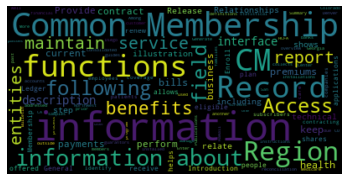

In [11]:
# Start with one entry
text=df1['Text'][3]

# generate a word cloud image
wordcloud=WordCloud().generate(text)

#display the generate image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

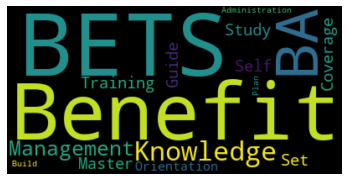

In [12]:
# Start with one entry
text=df1['Text'][13]

# generate a word cloud image
wordcloud=WordCloud().generate(text)

#display the generate image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The major words listed above seem to be fairly accurate. With the limited documents loaded it looks statisfactory

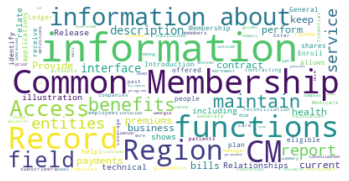

In [39]:
# create stopwords list:
stopwords=set(STOPWORDS)
stopwords.update(["Set","self","about","step","following"])
text=df1['Text'][3]
#Generate word cloud image
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)

#display the generate image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()